# THE 3C FORMULA OF FFSO IN THE GREATER CHINA

# I. Introduction

<font size=4 color=#55504F > As we started this project, we want to choose a topic with universality which can touch everyone's daily life. Recently, one of the hottest topics through mainland China and Hong Kong is the soap opera,Story of Yanxi Palace. We considered that Soap Opera could be a good topic. So, we tried to scrape DOUBAN.COM, the most influential online database about film, books and music in the great China. Then, stories emerged. The true problem is doing subtraction. What kinds of information are valuable? How to make our story useful to the audience? After our study, we found that the output value of Chinese TV dramas industry is getting bigger and bigger, so do the traffic of them, but not all in a good way. Much so-called popular soap opera is well-known for its low quality instead of merit. As members-to-be of the media industry, we have a simple idea that we want to see more excellent TV drama with both of fame and fortune. As a result, we decided and discussed this topic, how to make a soap opera with fame & fortune soap opera, which named The 3C Formula Of FFSO.


# II. Data Analysis And Data Visualization

In [2]:
import weibo as wb
import pandas as pd
import seaborn as sns
from pyecharts import Bar, Pie, Line, Graph, Overlap, WordCloud, EffectScatter
import matplotlib as plt
from IPython.display import Image
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "/Users/linhuiqing/venv/lib/python3.7/site-packages/lml/utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [3]:
df_tw = pd.read_csv('dataset/data_presentation/results_tw.csv', encoding = 'gbk').fillna('')
df_hk = pd.read_csv('dataset/data_presentation/results_hk.csv', encoding = 'gbk').fillna('')
df_ml = pd.read_csv('dataset/data_presentation/results_ml.csv', encoding = 'gbk').fillna('')

In [4]:
df_concat = pd.concat([df_tw, df_hk, df_ml], ignore_index = True).drop_duplicates()

<font size=4 color=#55504F >The process of data cleaning.

# 1. Catastrophe

<font size=4 color=#55504F >CN vs HK vs TW Market

In [4]:
def year_quantity(df):
    years = []
    numbers = []
    for i in df['年份'].drop_duplicates().sort_values():
        tmp = df[df['年份'] == i]
        years.append(i)
        numbers.append(len(tmp))
    results = pd.DataFrame({'年份': years, '总部数': numbers})
    return results

In [5]:
def year_quality(df):
    years = []
    scores = []
    for i in df['年份'].drop_duplicates().sort_values():
        tmp = df[df['年份'] == i]
        score = tmp['豆瓣评分'].sum() / len(tmp)
        years.append(i)
        scores.append(round(score, 2))
    results = pd.DataFrame({'年份': years, '平均分': scores})
    return results

In [6]:
def display_overlap(df, area):
    x = df['年份'].drop_duplicates().sort_values().apply(str)
    y1 = year_quantity(df)['总部数']
    y2 = year_quality(df)['平均分']
    
    bar = Bar(area)
    bar.add('总部数', x, y1, label_color = ['#EBAA5F'])

    line = Line()
    line.add('平均分', x, y2, yaxis_min = 5, yaxis_max = 9, label_color = ['#8B3F2D'])
    
    overlap = Overlap()
    overlap.add(bar)
    overlap.add(line, yaxis_index = 1, is_add_yaxis = True)

    return overlap

In [7]:
display_overlap(df_tw, '台湾')

In [8]:
display_overlap(df_hk, '香港')

In [9]:
display_overlap(df_ml, '大陆')

In [10]:
display_overlap(df_concat, '总体')

<font size=4 color=#55504F >In this chart, we see that compared to Taiwan and Hong Kong area, TV dramas in Mainland China have a low average DOUBAN grade.

# 2. Content

<font size=4 color=#55504F >Top & Most Rated  
Major Categories

In [11]:
tmp = df_concat[df_concat['年份'] > 2012]

In [12]:
tmp[tmp['评价人数/人'] > 100000].sort_values(by = '豆瓣评分', ascending = True).head(3)

剧名    年份                     导演              编剧  \
2154    深夜食堂  2017              蔡岳勋 / 胡涵清             陈怡方   
2155  漂亮的李慧珍  2017                    赵晨阳        卢至柔 / 杨青   
2321     青云志  2016  朱锐斌 / 周远舟 / 刘国辉 / 朱少杰  邵潇逸 / 张少微 / 张戬   

                                                     主演            类型 制片国家/地区  \
2154  黄磊 / 赵又廷 / 张钧甯 / 海清 / 何炅 / 陈意涵 / 马苏 / 刘昊然 / 萧敬...            剧情    中国大陆   
2155  迪丽热巴 / 盛一伦 / 李溪芮 / 张彬彬 / 王骁 / 王一楠 / 任伟 / 王一菲 /...       喜剧 / 爱情    中国大陆   
2321  李易峰 / 赵丽颖 / 杨紫 / 舒畅 / 王源 / 王俊凯 / 易烊千玺 / 熊乃瑾 / ...  奇幻 / 武侠 / 古装    中国大陆   

      集数 单集片长/分钟  豆瓣评分  评价人数/人  
2154  36      45   2.8  104240  
2155  40      43   2.8  109354  
2321  55      45   5.3  122359

In [13]:
tmp[tmp['评价人数/人'] > 100000].sort_values(by = '豆瓣评分', ascending = False).head(3)

剧名    年份       导演        编剧  \
2436   琅琊榜  2015  孔笙 / 李雪        海宴   
1941  白夜追凶  2017       王伟  指纹 / 顾小白   
2444   伪装者  2015       李雪        张勇   

                                                     主演            类型 制片国家/地区  \
2436  胡歌 / 刘涛 / 王凯 / 陈龙 / 黄维德 / 靳东 / 高鑫 / 张_琰 / 张龄心 ...       剧情 / 古装    中国大陆   
1941  潘粤明 / 王泷正 / 梁缘 / 吕晓霖 / 尹姝贻 / 侯雪龙 / 宋乃刚 / 王余阳 /...  剧情 / 悬疑 / 犯罪    中国大陆   
2444  胡歌 / 靳东 / 刘敏涛 / 王凯 / 宋轶 / 王乐君 / 王鸥 / 刘奕君 / 岳_ ...       剧情 / 悬疑    中国大陆   

      集数 单集片长/分钟  豆瓣评分  评价人数/人  
2436  54      45   9.2  256604  
1941  32      45   9.0  245310  
2444  48      40   8.4  100309



<font size=4 color=#55504F >In this part, we selected the most popular and high quality TV dramas, which quantified by grade over 8 and the number of grading people over 50,000. We called them BEST 48 and took them as the examples for FFSO. The detailed list is as fellows:

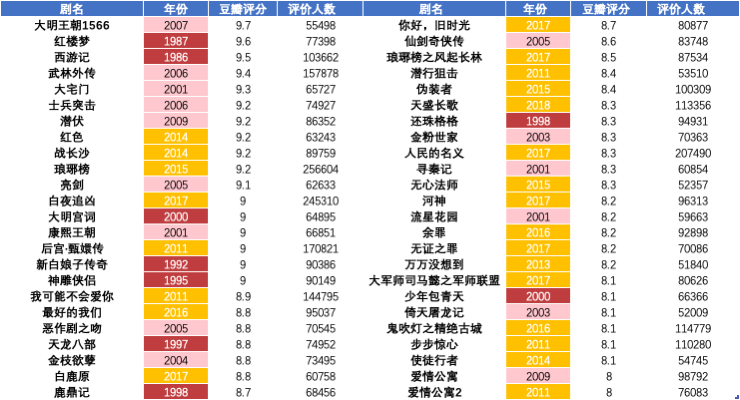

In [14]:
Image(filename = 'image/best48.png')

In [15]:
def style_quantity(df):
    styles = []
    for i in df['类型']:
        style = i.split(' / ')
        for j in style:
            if j != '':
                styles.append(j)
    tmp = pd.DataFrame({'styles': styles})['styles'].value_counts()
    results = pd.DataFrame({'类型': tmp.index, '总部数': tmp.values})
    results.drop(0, inplace = True)
    return results

In [16]:
def display_bar(df, area):
    x = style_quantity(df)['类型'][:10]
    y = style_quantity(df)['总部数'][:10]
    bar = Bar(area)
    bar.add('总部数', x, y, is_label_show = True, xaxis_interval = 0,label_color =  ['#EBAA5F'])
    return bar

In [17]:
display_bar(df_tw, '台湾')

In [18]:
display_bar(df_hk, '香港')

In [19]:
display_bar(df_ml, '大陆')

<font size=4 color=#55504F >The three column graphs below show the major categories of tv dramas in mainland, Hong Kong and Taiwan respectively. The height of the columns tells the number of each category being filmed. The graphs indicated clearly the similarities and differences among the markets. We can see that #Romance, Comedy, Costume stories dominate the markets, and #Homosexual is available only in TW, restricted in CN. 

In [20]:
name = style_quantity(df_concat)['类型']
value = style_quantity(df_concat)['总部数']
wordcloud = WordCloud('总体')
wordcloud.add('', name, value, shape = 'circle', word_size_range = [20, 100])

<font size=4 color=#55504F >In the tag cloud, we aimed at determining the mostly film categories in all of the three markets, as a result of which, romance, costume and comedy stood out.

<font size=4 color=#55504F >Then, we start to talk about the 3C. Here is the first C, Content. 
The two pie charts below are used to demonstrate the proportion of romantic dramas in all dramas, and in top rated dramas, so as to realise the “20/80 effect” of romantic dramas in China.

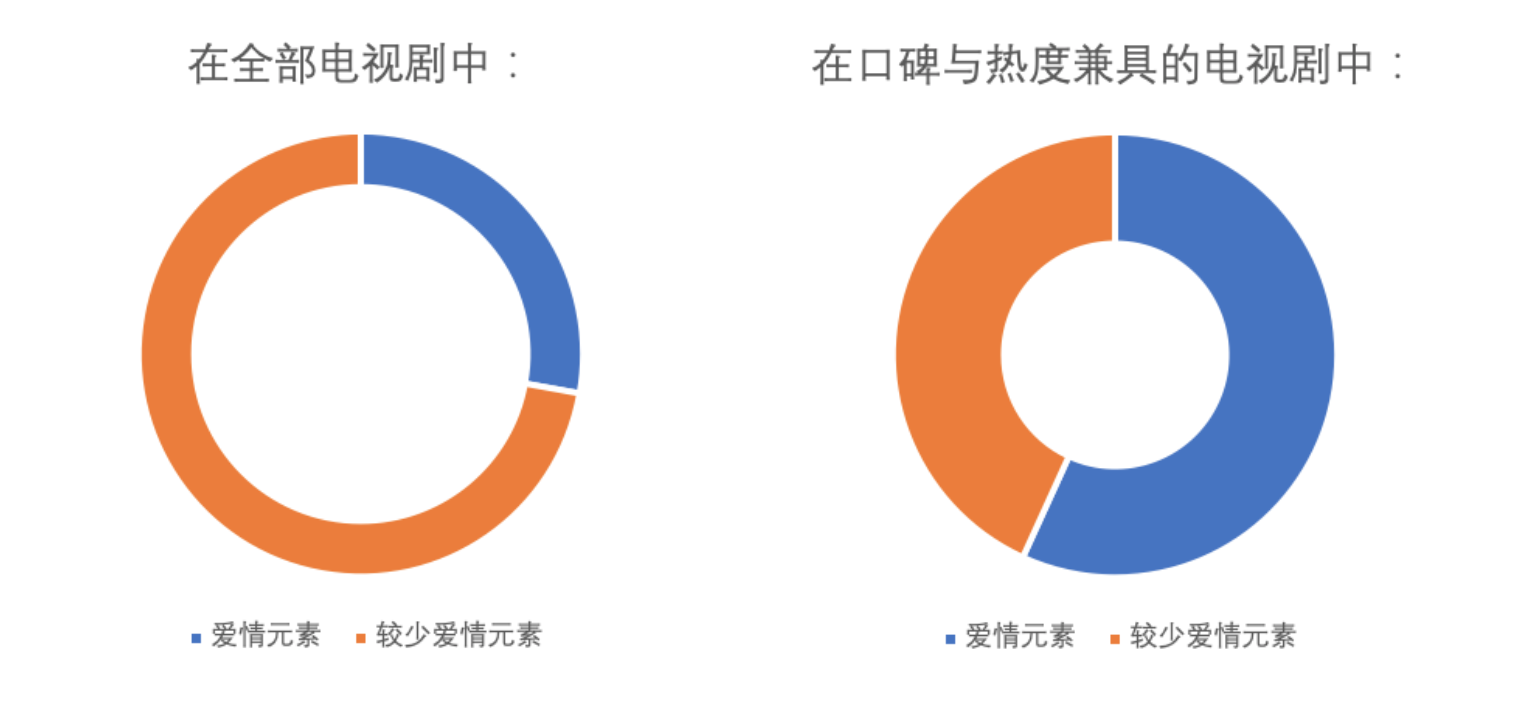

In [21]:
Image(filename = 'image/content.png')

# 3. Cast

<font size=4 color=#55504F >Now, we are going to talk about the second C, Cast.   
    1)Most Seen Cast in Catastrophe  
    2)Experience  
    3)The Relationships Between Actors  



In [22]:
def actor_score_number(df):
    actors = []
    scores = []
    for i in df.index:
        tmp = (df['主演'][i].split(' / '), df['豆瓣评分'][i])
        for actor in tmp[0]:
            if actor != '':
                actors.append(actor)
                scores.append(tmp[1])
    datas = pd.DataFrame({'actors': actors, 'scores': scores})
    actors = datas.actors.drop_duplicates()
    my1 = []
    my2 = []
    my3 = []
    for actor in actors:
        my1.append(actor)
        tmp = datas[datas.actors == actor]
        my2.append(round(tmp.scores.sum() / len(tmp), 2))
        my3.append(len(tmp))
    results = pd.DataFrame({'演员': my1, '平均分': my2, '部数': my3}).sort_values('平均分', ascending = False)
    return results

In [23]:
# actor_score_number(df_concat).to_csv('dataset/演员-平均分-部数.csv', index = False, encoding = 'gbk')

In [24]:
df = pd.read_csv(open('dataset/演员-平均分-部数.csv',encoding = 'gbk'))

<font face="黑体" size=4 color=#3A5FCD > We culculated the average of one actor's all works' DOUBAN grade and take it as the indicator of this actors' acting ability. Then we found that young actor's performance is related to their work quantity. We took the the top trending Weibo stars as example.

In [25]:
wb90s = pd.DataFrame({'演员': [item[0] for item in wb.weibo90s().items()], '粉丝数': [item[1] for item in wb.weibo90s().items()]})
wbfans30 = pd.DataFrame({'演员': [item[0] for item in wb.weibofans30().items()], '粉丝数': [item[1] for item in wb.weibofans30().items()]})
wb90s = pd.merge(wb90s, df)
wbfans30 = pd.merge(wbfans30, df)

In [26]:
def display_overlap(df, name):
    x = df['演员']
    y1 = df['部数']
    y2 = df['平均分']
    bar = Bar(name, '注：横坐标依据粉丝数从大到小排列')
    line = Line()
    bar.add('部数', x, y1, xaxis_interval = 0, is_datazoom_show = True, datazoom_range = [0, 50])
    line.add('平均分', x, y2, is_label_show = True,yaxis_min = 0, yaxis_max = 10)
    overlap = Overlap()
    overlap.add(bar)
    overlap.add(line, yaxis_index = 1, is_add_yaxis = True)
    return overlap

<font size=4 color=#55504F >In accordance with the top trending Weibo stars in China and the list of mostly seen actors/actresses in the low rated dramas, the graph below implies the relationship between number of dramas played and average rating to demonstrate that experiences help improve their performances.

In [27]:
display_overlap(wb90s, '微博九零后')

In [28]:
display_overlap(wbfans30, '微博粉丝榜')

In [29]:
# actor_score_number(df_tw).to_csv('dataset/data_presentation/asn_tw.csv', index = False, encoding = 'gbk')
# actor_score_number(df_hk).to_csv('dataset/data_presentation/asn_hk.csv', index = False, encoding = 'gbk')
# actor_score_number(df_ml).to_csv('dataset/data_presentation/asn_ml.csv', index = False, encoding = 'gbk')

In [30]:
asn_tw = pd.read_csv('dataset/data_presentation/asn_tw.csv',encoding = 'gbk')
asn_hk = pd.read_csv('dataset/data_presentation/asn_hk.csv',encoding = 'gbk')
asn_ml = pd.read_csv('dataset/data_presentation/asn_ml.csv',encoding = 'gbk')

In [31]:
def df_clean(df):
    df = df[df['部数'] > 3].sort_values(by = '部数', ascending = False).head(10)
    return df

In [32]:
def display_overlap(df, name):
    x = df['演员']
    y1 = df['部数']
    y2 = df['平均分']
    bar = Bar(name, '注：横坐标依据电视剧部数从大到小排列')
    line = Line()
    bar.add('部数', x, y1, xaxis_interval = 0)
    line.add('平均分', x, y2, is_label_show = True,yaxis_min = 0, yaxis_max = 10)
    overlap = Overlap()
    overlap.add(bar)
    overlap.add(line, yaxis_index = 1, is_add_yaxis = True)
    return overlap

<font size=4 color=#55504F > The following column charts show the number of dramas played by the top rated actors/actresses as well as their scores in mainland, Hong Kong and Taiwan respectively that further justify experiences matter.

In [33]:
display_overlap(df_clean(asn_tw), '台湾')

In [34]:
display_overlap(df_clean(asn_hk), '香港')

In [35]:
display_overlap(df_clean(asn_ml), '大陆')

<font size=4 color=#55504F >We also want to know the relationship between actors with good performance.

In [36]:
df_hot = df_concat[df_concat['评价人数/人'] > 100000]

In [37]:
def actor_number(df):
    actors = []
    for i in df['主演']:
        tmp = i.split(' / ')
        for actor in tmp:
            if (actor != '') & (actor.find('_') == -1):
                actors.append(actor)
    datas = pd.DataFrame({'actors': actors})
    results = pd.DataFrame({'演员': datas.actors.value_counts().index, '部数': datas.actors.value_counts().values})
    results = results[results['部数'] > 1]
    return results

In [38]:
def find_nodes(df):
    tmp = actor_number(df)
    nodes = []
    for i in tmp.index:
        dic = {}
        dic['name'] = tmp['演员'][i]
        dic['value'] = tmp['部数'][i]
        dic['symbolSize'] = tmp['部数'][i] * 3
        nodes.append(dic)
    return nodes

In [39]:
nodes_hot = find_nodes(df_hot)

In [40]:
def actor_list(df):
    results = []
    for actors in df['主演']:
        if actors != '':
            result = []
            for actor in actors.split(' / '):
                if (actor != '') & (actor.find('_') == -1):
                    result.append(actor)
            results.append(result)
    return results

In [41]:
def find_df(df):
    tmp = actor_list(df)
    source = []
    target = []
    for actors in tmp:
        for i in range(len(actors)-1):
            for j in actors[i+1:]:
                source.append(actors[i])
                target.append(j)
    results = pd.DataFrame({'source': source, 'target': target})
    return results

In [42]:
links_hot = []
for index, row in find_df(df_hot).iterrows():
    source = row.source
    target = row.target
    links_hot.append({'source': source, 'target': target})

In [43]:
def display_graph(nodes, links):
    graph = Graph('热门电视剧演员关系图')
    graph.add('', nodes, links)
    return graph

In [44]:
display_graph(nodes_hot, links_hot).render('热门电视剧演员关系图.html')

<font size=4 color=#55504F >Above is the relation map(below is a screenshot)  of actor Jin Dong with regards to its cooperations in tv dramas with other actors and actresses, as the sizes of the spots indicate the times of cooperation between the two actors/actresses and the distances between the spots imply the closeness, which is aiming at proving that personal or professional relationship between actors and actresses are helpful.

In [55]:
display_graph(nodes_hot, links_hot)

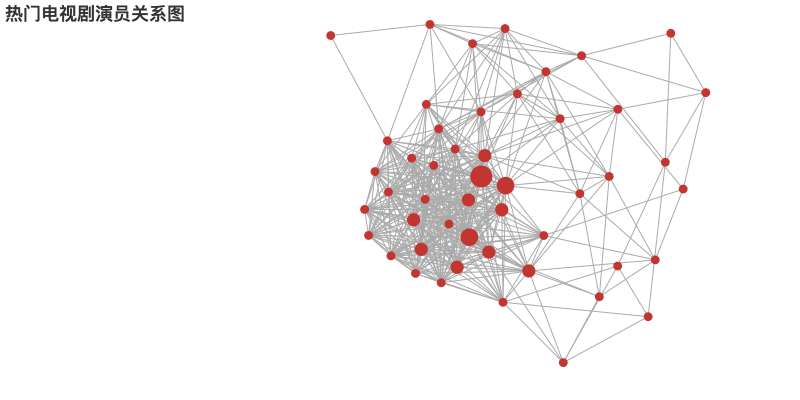

In [5]:
Image(filename = 'image/actorsrelation.png')

<font size=4 color=#55504F >Cooperation

In [56]:
datas = pd.read_csv('dataset/tmp.csv', encoding = 'gbk')
results = pd.DataFrame(index = datas['年份'].drop_duplicates().sort_values())

In [57]:
def add_column(area):
    column = []
    for year in results.index:
        column.append(len(datas[(datas['年份'] == year) & (datas['制片国家/地区'] == area)]))
    results[area] = column

In [58]:
areas = ['香港 / 台湾', '中国大陆 / 香港', '中国大陆 / 台湾', '中国大陆 / 香港 / 台湾']
for area in areas:
    add_column(area)

In [60]:
es = EffectScatter('三地合作情况图', '注：纵坐标代表合作程度，值越大表示合作次数越多')
x = results.index
def add_es(area):
    values = []
    for value in results[area].values:
        if value == 0:
            values.append(None)
        else:
            values.append(value)
    y = values
    es.add(area, x, y, xaxis_min = 1985, xaxis_max = 2020, xaxis_force_interval = 5)

In [61]:
for area in areas:
    add_es(area)

In [62]:
es

# 4. Channel

<font size=4 color=#55504F >The last C, it's the Channel. We noticed that in mainland China, online show is more and more popular.
The scatter plot below shows the result of top rated tv dramas in mainland 2017 according to douban, with x axis of its score and y axis of its number of reviews. From which we can tell one out of top three is online show, suggesting online shows can be reputation promising.

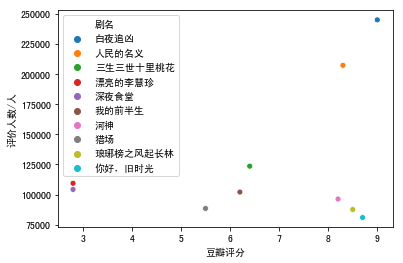

In [63]:
df_ml['年份'] = df_ml['年份'].apply(str)
df_ml2017 = df_ml[df_ml['年份'] == '2017']
top10 = df_ml2017.sort_values(by = '评价人数/人', ascending = False).head(10)
axes = sns.scatterplot(x = '豆瓣评分', y = '评价人数/人', hue = '剧名', data = top10)

<font size=4 color=#55504F > We found that in 2017, 1 in top 3 is online show, and in 2018, 2 in top 3 are online show.

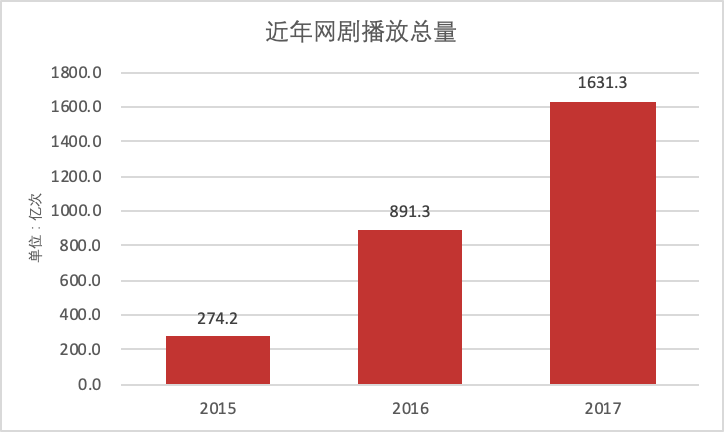

In [64]:
Image(filename = 'image/online.png')

#  III. Conclusions

<font size=4 color=#55504F >Finally, we got the 3C formula to creat soap operas with both fame and fortune:

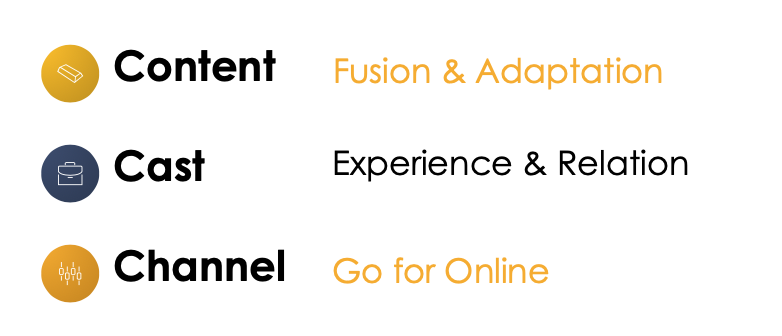

In [65]:
Image(filename = 'image/formula.png')